<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Load-the-data" data-toc-modified-id="Load-the-data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load the data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Class-Balance" data-toc-modified-id="Class-Balance-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Class Balance</a></span></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Random-Under-Sampling" data-toc-modified-id="Random-Under-Sampling-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Random Under Sampling</a></span></li></ul></li><li><span><a href="#Train-Test-split-with-stratify-for-imbalanced-data" data-toc-modified-id="Train-Test-split-with-stratify-for-imbalanced-data-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Train Test split with stratify for imbalanced data</a></span><ul class="toc-item"><li><span><a href="#Check-for-nans-before-modelling" data-toc-modified-id="Check-for-nans-before-modelling-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Check for nans before modelling</a></span></li></ul></li><li><span><a href="#Modelling" data-toc-modified-id="Modelling-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Modelling</a></span><ul class="toc-item"><li><span><a href="#Classifiers" data-toc-modified-id="Classifiers-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Classifiers</a></span></li><li><span><a href="#Recall-Scores-from-Cross-Validation" data-toc-modified-id="Recall-Scores-from-Cross-Validation-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Recall Scores from Cross Validation</a></span></li></ul></li><li><span><a href="#SVC-with-Calibrated-Probabilities" data-toc-modified-id="SVC-with-Calibrated-Probabilities-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>SVC with Calibrated Probabilities</a></span></li><li><span><a href="#Run-Time" data-toc-modified-id="Run-Time-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Run Time</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Imports

In [19]:
import time
time_start_notebook = time.time()

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(color_codes=True)

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import os
import time

# random state
SEED = 0
RNG = np.random.RandomState(SEED)

# Jupyter notebook settings for pandas
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 100) # None for all the rows
pd.set_option('display.max_colwidth', 50)

# six and pickle
import six
import pickle
import joblib

# ml
import sklearn

# scale and split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# grid search
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

# pipeline
from sklearn.pipeline import make_pipeline

# cross validations

#------------------
# cross_val_score(lasso, X, y, cv=5,n_jobs=-1,scoring='r2')
# cross_val_score(clf,   X, y, cv=5,n_jobs=-1,scoring='recall')
from sklearn.model_selection import cross_val_score

#------------------
# cross_val_predict may differ from cross_validate and cross_val_score
# cross_val_predict can be used for plotting.
# ypreds = cross_val_predict(lasso, X, y, cv=5,n_jobs=-1,scoring='r2')
# ypreds = cross_val_predict(clf,   X, y, cv=5,n_jobs=-1,scoring='recall')
from sklearn.model_selection import cross_val_predict

#------------------
# cv_results = cross_validate(lasso, X, y, cv=5,n_jobs=-1,scoring='r2')
# print(cv_results['test_score'])
from sklearn.metrics.scorer import make_scorer
from sklearn.model_selection import cross_validate

# sklearn scalar metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# multiple metrics
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_fscore_support

# roc auc and curves
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve

# confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Bhishan Poudel 2021-08-10 

CPython 3.7.7
IPython 7.22.0

compiler   : Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 19.6.0
machine    : x86_64
processor  : i386
CPU cores  : 4
interpreter: 64bit

joblib     1.0.1
autopep8   1.5.2
matplotlib 3.2.1
six        1.15.0
numpy      1.19.5
sklearn    0.23.1
pandas     1.3.0
json       2.0.9
seaborn    0.11.0



In [20]:
# my local library
import sys
sys.path.append("/Users/poudel/Dropbox/a00_Bhishan_Modules/bhishan/")
from bhishan import bp

# Useful Functions

In [21]:
def get_profit(y_true, y_pred):
    tn, fp, fn, tp = sklearn.metrics.confusion_matrix(y_true,y_pred).ravel()
    profit = 400*tp - 200*fn - 100*fp
    return profit

scoring = sklearn.metrics.make_scorer(get_profit, greater_is_better=True)

# Load the data

In [22]:
df = pd.read_csv('https://github.com/bhishanpdl/Datasets/blob/master/Projects/Fraud_detection/raw/creditcard.csv.zip?raw=true',compression='zip')
print(df.shape)
df.head()

(284807, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Preprocessing

## Class Balance

In [23]:
target = 'Class'
df[target].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [24]:
df[target].value_counts(normalize=True)*1000

0    998.272514
1      1.727486
Name: Class, dtype: float64

## Scaling

In [25]:
# RobustScaler is less prone to outliers.
from sklearn.preprocessing import StandardScaler, RobustScaler

scaler = RobustScaler()

df['scaled_amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = scaler.fit_transform(df['Time'].values.reshape(-1,1))

## Random Under Sampling
- If classes are imbalanced, more frequent class causes overfitting.
- We can use undersampling of classes.
- Faster to train the model, since lower number of samples are remained.

Cons:
- Large number of rows may be dropped and risk of information loss.

In [26]:
# without removing outliers
n = df[target].value_counts().values[-1]

df_under = (df.groupby(target)
                .apply(lambda x: x.sample(n,random_state=SEED))
                .reset_index(drop=True)
               )

df_under[target].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [27]:
df.shape, df_under.shape
# out of 284k samples, we now have 984 samples for undersampling
# we have lost 283k samples and have only 1k samples
# this is a lot of information losss, but still I will test the 
# classifiers with this undersampling method.
#
# Later, I will use oversampling methods to do the modelling.

((284807, 33), (984, 33))

# Train Test split with stratify for imbalanced data

In [28]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'scaled_amount', 'scaled_time'],
      dtype='object')

In [29]:
(Xtrain_under, Xtest_under,
 ytrain_under, ytest_under) = \
    train_test_split(df_under.drop([target],1),
                     df_under[target],
                     random_state=SEED,
                     test_size=0.2,
                     #stratify=df_under[target] # do no use stratify here.
                     )

print(df.shape, Xtrain_under.shape, Xtest_under.shape)
columns = df.columns.difference([target]).values.tolist() + [target]

df_train_under = pd.DataFrame(data=np.c_[Xtrain_under,
                                         ytrain_under],
                              columns=columns)

df_test_under = pd.DataFrame(data=np.c_[Xtest_under
                                        ,ytest_under],
                             columns=columns)

print(df.shape, df_train_under.shape, df_test_under.shape)
df_train_under.head(2)

(284807, 33) (787, 32) (197, 32)
(284807, 33) (787, 33) (197, 33)


/Users/poudel/opt/miniconda3/envs/dataSc/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



,Amount,Time,V1,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V2,V20,V21,V22,V23,V24,V25,V26,V27,V28,V3,V4,V5,V6,V7,V8,V9,scaled_amount,scaled_time,Class
0,29785.0,0.923764,0.344048,-2.880004,1.721680,-3.019565,-0.639736,-3.801325,1.299096,0.864065,-2.895252,3.028162,-2.549177,-1.560432,-2.971317,1.078895,-4.702012,-4.908099,-1.508873,3.001685,0.170872,0.899931,1.481271,0.725266,0.176960,-1.815638,-0.536517,0.489035,-0.049729,30.30,0.115978,-0.645062,1.0
1,146398.0,1.790673,-0.803475,-0.869963,0.154827,-0.292277,0.350580,-0.589416,0.183619,1.126239,0.034143,0.177329,0.439569,-0.480873,0.296339,0.473388,0.738279,-1.134799,1.134228,0.130572,0.024448,0.277790,0.621435,-0.002887,0.090027,-0.132452,-0.267803,-0.001150,-0.027962,118.37,1.346608,0.724938,0.0


In [30]:
df_train_under[target].value_counts()

0.0    401
1.0    386
Name: Class, dtype: int64

In [31]:
df_test_under[target].value_counts()

1.0    106
0.0     91
Name: Class, dtype: int64

## Check for nans before modelling

In [32]:
for x in [df, df_under,
          df_train_under, df_test_under,
         ]:
    print(x.isnull().sum().sum())

0
0
0
0


In [33]:
df_under.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class', 'scaled_amount', 'scaled_time'],
      dtype='object')

In [34]:
df_train_under.columns

Index(['Amount', 'Time', 'V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16',
       'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25',
       'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'scaled_amount', 'scaled_time', 'Class'],
      dtype='object')

# Modelling

<div class="alert alert-block alert-info">
<b>NOTE:</b> Always used random state and n_jobs whenever possible <br><br>
No random_state: knn <br>
No n_jobs: svc and dtree <br>
<br>
liblinear: It has both 'l1' and 'l2' penalty.<br>
liblinear: It has n_jobs as +1, but lbfgs support -1. <br>
lbfgs: It has only 'l2' but it is faster for large datasets.<br>
<br>
liblinear :random_state<br>
lbfgs: both <br>
svc: random_state only<br>
knn: n_jobs only<br>
dtree: n_jobs only<br>
rf: both<br>


</div>

</div>

<div class="alert alert-block alert-info">
<b>NOTE:</b> Confusion Matrix Terms
    <br>
Fraud ==> Fraud TP <br>
Non-Fraud ==> Non-Fraud TN <br>
Fraud ==> Non-Fraud FN (I am interested in this) <br>
Non-Fraud ==> Fraud FP
<br>

</div>


## Classifiers

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.calibration import CalibratedClassifierCV

In [36]:
features_with_log = df_under.columns.difference(
    ['Amount','Time','Class']).values.tolist()

features = features_with_log
print(features)

['V1', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V2', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'scaled_amount', 'scaled_time']


In [37]:
# numpy arrays
Xtrain = df_train_under[features].values
Xtest = df_test_under[features].values

ytrain = df_train_under[target].values.ravel()
ytest = df_test_under[target].values.ravel()

Xtrain.shape, ytrain.shape, Xtest.shape,  ytest.shape

((787, 30), (787,), (197, 30), (197,))

In [38]:
clf_lr = LogisticRegression(solver='liblinear',
                            max_iter=4000,
                            random_state=SEED,
                            n_jobs=1,) # for liblinear n_jobs is +1.

clf_svc = SVC(random_state=SEED,gamma='scale')
clf_knn = KNeighborsClassifier(n_jobs=-1)
clf_dtc = DecisionTreeClassifier(random_state=SEED)
clf_rfc = RandomForestClassifier(n_estimators=100,
                                random_state=SEED,n_jobs=-1)

clf_lr_cali = CalibratedClassifierCV(clf_svc, method='sigmoid', cv=5)
clf_svc_cali = CalibratedClassifierCV(clf_svc, method='sigmoid', cv=5)
clf_knn_cali = CalibratedClassifierCV(clf_svc, method='sigmoid', cv=5)
clf_dtc_cali = CalibratedClassifierCV(clf_svc, method='sigmoid', cv=5)
clf_rfc_cali = CalibratedClassifierCV(clf_svc, method='sigmoid', cv=5)

clf_names = ["Logisitic Regression","Support Vector Classifier",
            "KNN", "Decision Tree Classifier","Random Forest Classifier",
            ]

clf_names +=  ["Calibrated " + i for i in clf_names]
clf_names

['Logisitic Regression',
 'Support Vector Classifier',
 'KNN',
 'Decision Tree Classifier',
 'Random Forest Classifier',
 'Calibrated Logisitic Regression',
 'Calibrated Support Vector Classifier',
 'Calibrated KNN',
 'Calibrated Decision Tree Classifier',
 'Calibrated Random Forest Classifier']

## Recall Scores from Cross Validation

In [39]:
X = df_under[features_with_log].values
y = df_under[target].values.ravel()

In [40]:
from sklearn.model_selection import cross_val_score

classifiers = [clf_lr, clf_svc, clf_knn, clf_dtc, clf_rfc,
               clf_lr_cali, clf_svc_cali, clf_knn_cali, clf_dtc_cali, clf_rfc_cali]
recall_cross_val_scores = []

t0 = time.time()
for clf in classifiers:
    clf.fit(X, y)
    score = cross_val_score(clf, X, y, cv=5,n_jobs=-1,scoring='recall')
    recall_cross_val_scores.append(score.mean())
    
t1 = (time.time() - t0)

print('Time taken: {} minutes {:.2f} seconds'.format(*divmod(t1,60)))
    
df_recall_cross_val_scores = pd.DataFrame({'Classifier': clf_names,
                'Recall Cross Validation Score': recall_cross_val_scores})

df_recall_cross_val_scores = df_recall_cross_val_scores\
    .sort_values('Recall Cross Validation Score',ascending=False)

df_recall_cross_val_scores.index = range(len(df_recall_cross_val_scores))

df_recall_cross_val_scores.style.background_gradient(
    subset=['Recall Cross Validation Score']).set_caption(
    'Recall Cross Validation Scores for Default Classifiers for Undersampled Data')

Time taken: 0.0 minutes 4.35 seconds


,Classifier,Recall Cross Validation Score
0,Decision Tree Classifier,0.928798
1,Logisitic Regression,0.912575
2,Random Forest Classifier,0.902412
3,KNN,0.898330
4,Calibrated Logisitic Regression,0.892208
5,Calibrated Support Vector Classifier,0.892208
6,Calibrated KNN,0.892208
7,Calibrated Decision Tree Classifier,0.892208
8,Calibrated Random Forest Classifier,0.892208
9,Support Vector Classifier,0.869841


# SVC with Calibrated Probabilities

Reference: https://machinelearningmastery.com/calibrated-classification-model-in-scikit-learn/

In [41]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

In [42]:
model = SVC()
model

SVC()

In [43]:
def uncalibrated(Xtrain, Xtest, ytrain):
    # fit a model
    model = SVC(random_state=SEED,gamma='scale')
    model.fit(Xtrain, ytrain)
    
    # predict probabilities
    return model.decision_function(Xtest)

In [44]:
def calibrated(Xtrain, Xtest, ytrain):
    # define model
    model = SVC(random_state=SEED,gamma='scale')
    
    # define and fit calibration model
    calibrated = CalibratedClassifierCV(model, method='sigmoid', cv=5)
    calibrated.fit(Xtrain, ytrain)
    
    # predict probabilities
    return calibrated.predict_proba(Xtest)[:, 1]

In [45]:
# uncalibrated predictions
ypreds = uncalibrated(Xtrain, Xtest, ytrain)

In [46]:
# calibrated predictions
ypreds_cal = calibrated(Xtrain, Xtest, ytrain)

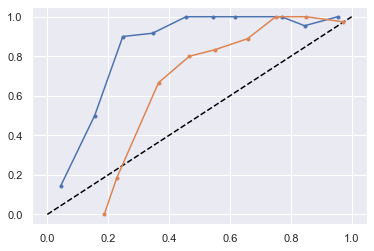

In [47]:
# reliability diagrams
from sklearn.calibration import calibration_curve

fop, mpv = calibration_curve(ytest,ypreds,n_bins=10,normalize=True)

fop_cal, mpv_cal = calibration_curve(ytest,ypreds_cal,n_bins=10)

# plot perfectly calibrated
plt.plot([0, 1], [0, 1], linestyle='--', color='black')

# plot model reliabilities
plt.plot(mpv, fop, marker='.')
plt.plot(mpv_cal, fop_cal, marker='.')
plt.show()

# Run Time

In [48]:
time_taken = time.time() - time_start_notebook
h,m = divmod(time_taken,60*60)
print('Time taken to run whole notebook: {:.0f} hr '\
      '{:.0f} min {:.0f} secs'.format(h, *divmod(m,60)))

Time taken to run whole notebook: 0 hr 0 min 13 secs


In [49]:
import subprocess
subprocess.call(['python', '-m', 'nbconvert', '*.ipynb'])

1

In [50]:
!mv *.html ../html/

mv: rename *.html to ../html/: No such file or directory


In [51]:
!rm -r catboost_info